In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [43]:
dataset = pd.read_csv("dataset.csv")

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
dataset.shape

(303, 14)

In [47]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [49]:
dataset['target'].value_counts()

# 0 indicates a healthy heart i.e lesser chances of heart attack
# 1 indicates a defective heart i.e. more chances of a heart attack

target
1    165
0    138
Name: count, dtype: int64

In [50]:
target_values = dataset ['target']

In [51]:
target_values

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

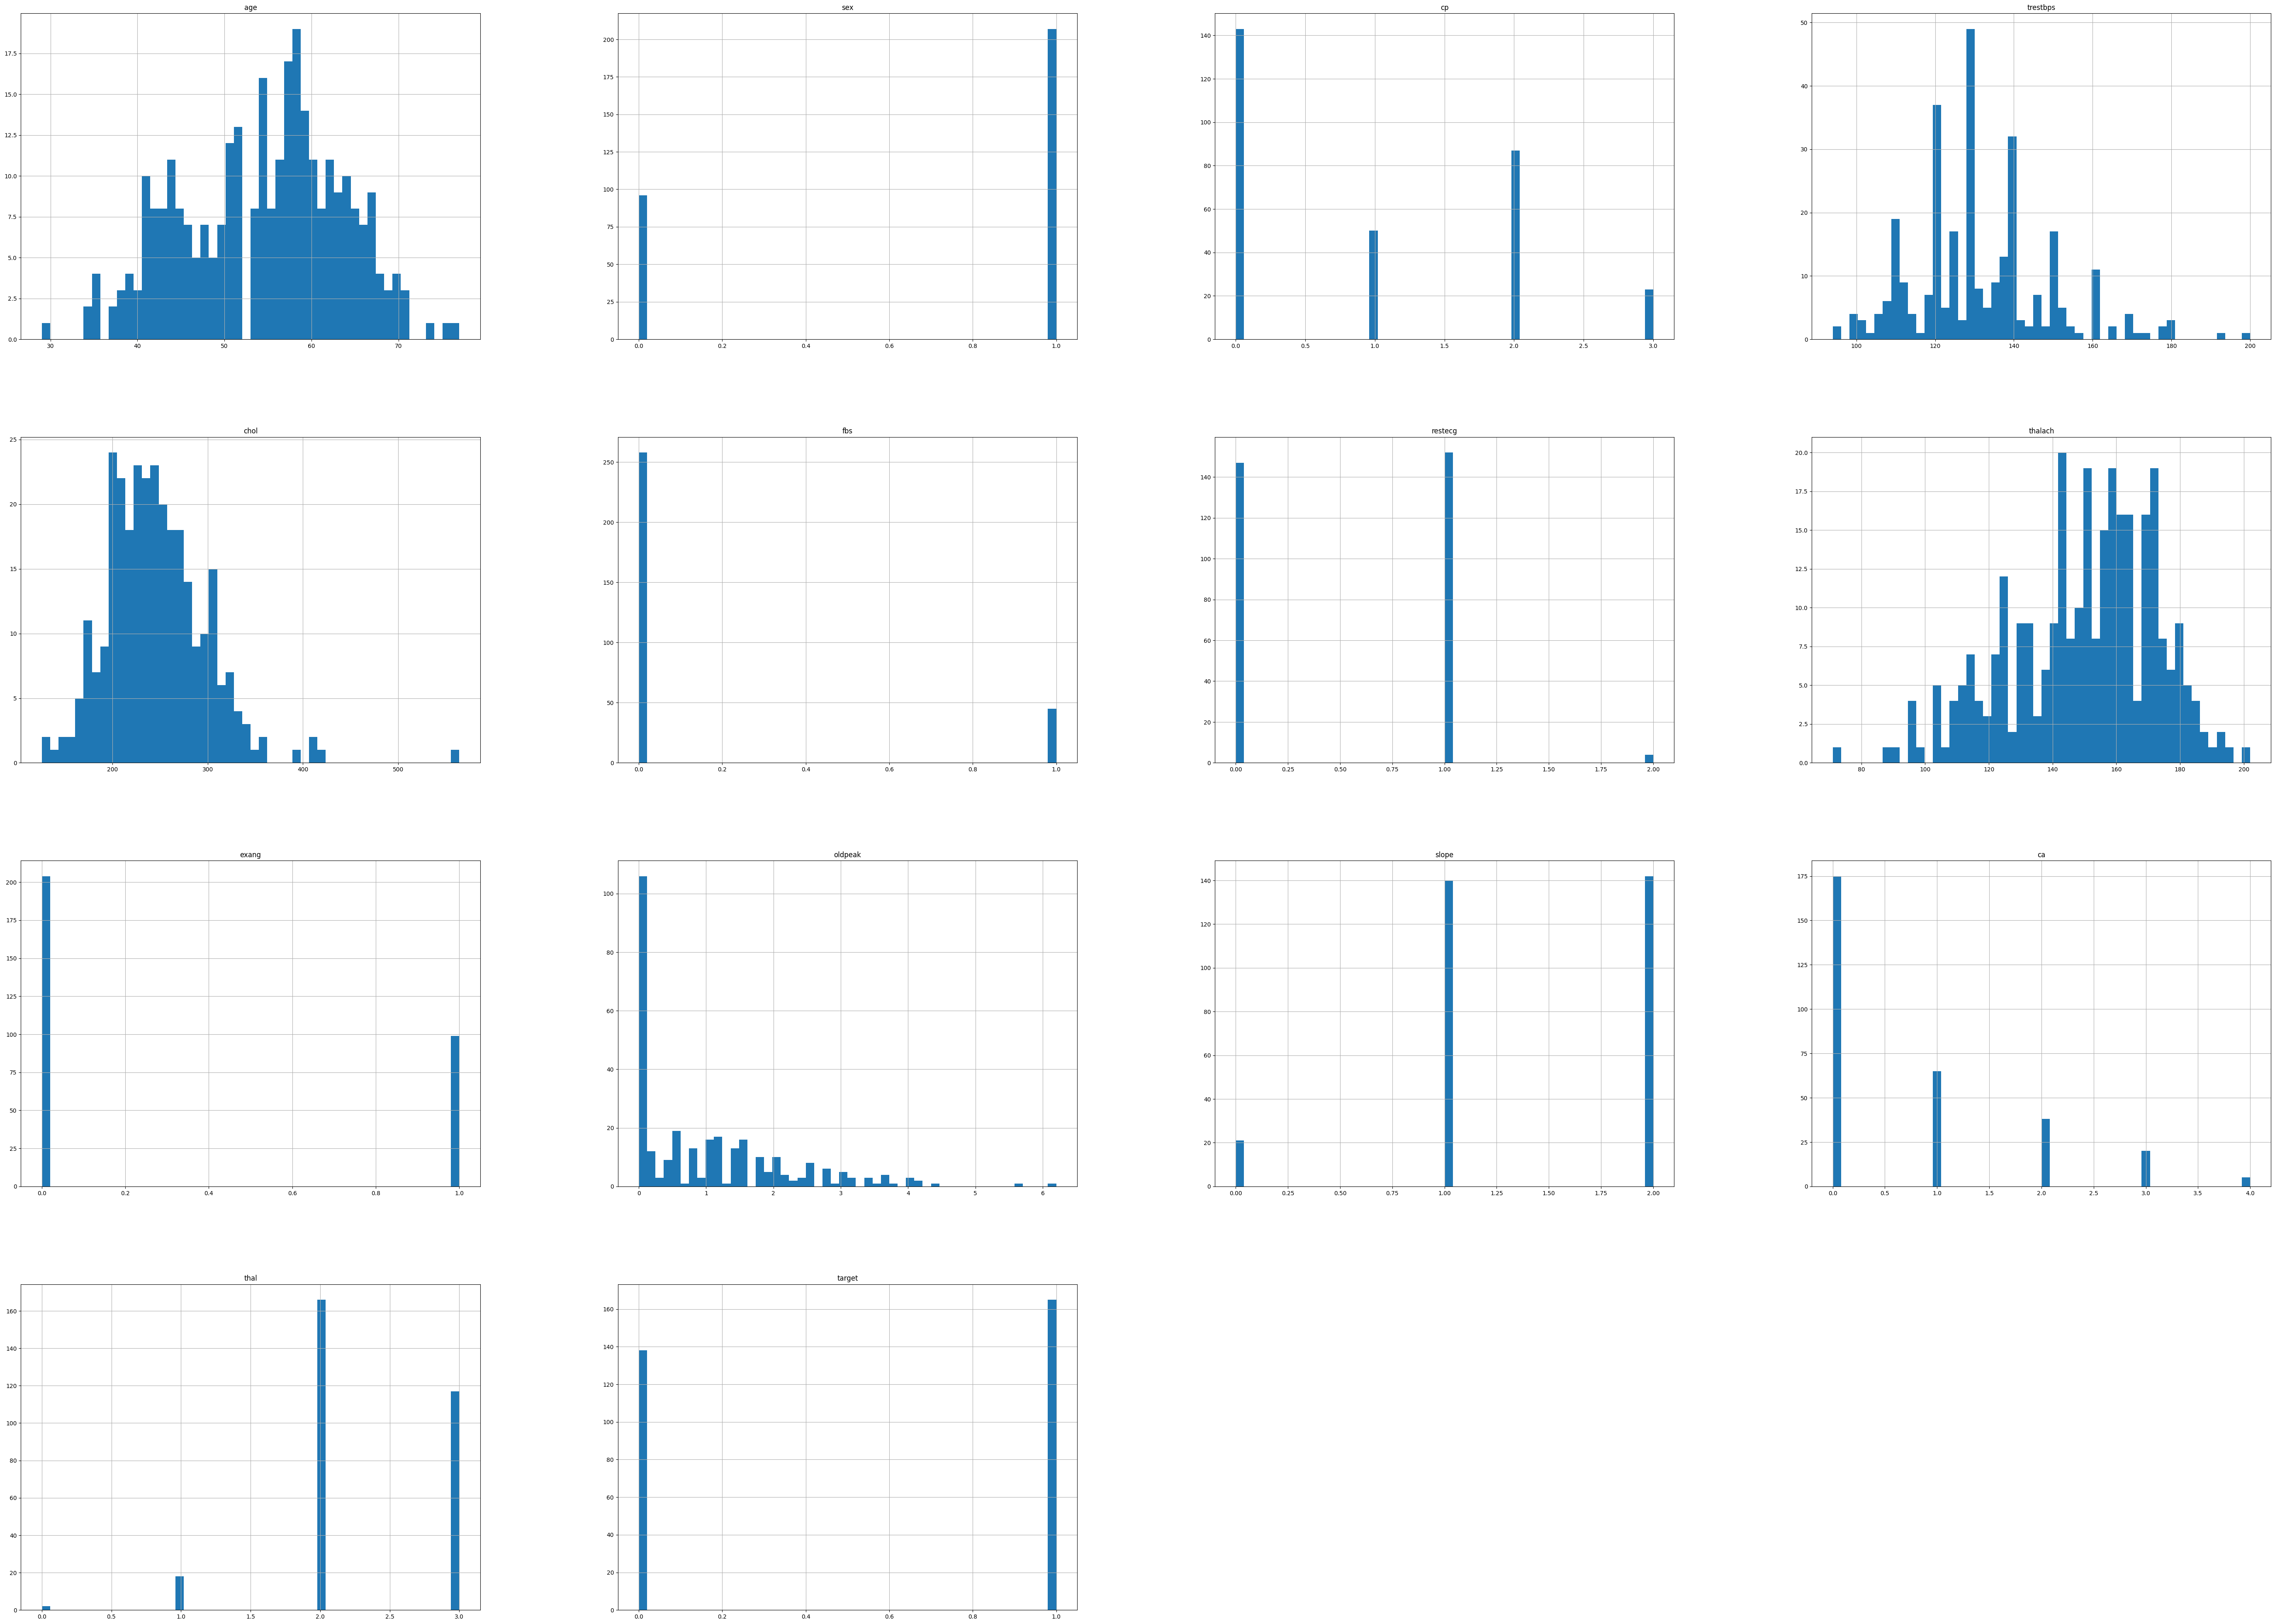

In [52]:
%matplotlib inline
import matplotlib.pyplot as  plt
dataset.hist (bins=50, figsize = (70,50))

In [53]:
new_ds = dataset.drop (columns = "target", axis = 1)

In [54]:
new_ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [55]:
all_targets = dataset ["target"].copy()

In [56]:
all_targets

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

--------  TRAIN_TEST SPLITTING OF THE DATA

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (new_ds, all_targets, test_size = 0.25,random_state= 135, shuffle = True)

In [58]:
print("The size of the train dataset is:", X_train.shape)
print("The size of the test dataset is:", X_test.shape)

The size of the train dataset is: (227, 13)
The size of the test dataset is: (76, 13)


----- We would have to decide which model to use

In [59]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

----- Now we have to train the model using the training data set

In [60]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3


In [61]:
Y_train

253    0
256    0
170    0
78     1
90     1
      ..
184    0
197    0
219    0
187    0
159    1
Name: target, Length: 227, dtype: int64

In [62]:
model1.fit (X_train, Y_train)  # Training the model

C:\Users\Shahmeer Sajid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
Y_predicted1 = (model1.predict (X_test))

In [64]:
Y_predicted1

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

Performance Metrics

In [65]:
accuracy1 = accuracy_score (Y_test,Y_predicted1)

In [66]:
print ("The accuracy is:", accuracy1 * 100, "%")

The accuracy is: 90.78947368421053 %


In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
final_mse1 = mean_squared_error (Y_test, Y_predicted1)

In [69]:
print("The root mean squared error is:",np.sqrt(final_mse1))

The root mean squared error is: 0.30348848933344197


------ BUILDING A PREDICTIVE SYSTEM

In [70]:
INPUT_DATA = []

In [71]:
for i in range(13):
    feature = input(f"Enter feature {i + 1}: ")
    INPUT_DATA.append(feature)


Enter feature 1:  1
Enter feature 2:  1
Enter feature 3:  1
Enter feature 4:  1
Enter feature 5:  1
Enter feature 6:  1
Enter feature 7:  1
Enter feature 8:  1
Enter feature 9:  1
Enter feature 10:  1
Enter feature 11:  1
Enter feature 12:  1
Enter feature 13:  1


In [78]:
INPUT_DATA_ARRAY = np.array(INPUT_DATA, dtype = float)

In [79]:
INPUT_DATA_ARRAY

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [80]:
prediction = model1.predict (INPUT_DATA_ARRAY.reshape(1, -1))

C:\Users\Shahmeer Sajid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [81]:
if prediction == 0:
    print("You have a healthy heart, lesser chances of heart attack :) ")
else:
    print ("You do not have a healthy heart, more chances of heart attack :) ")

You have a healthy heart, lesser chances of heart attack :) 
